In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

params={'legend.fontsize':'18','axes.labelsize':'18',
        'axes.titlesize':'18','xtick.labelsize':'18',
        'ytick.labelsize':'18','lines.linewidth':2,
        'axes.linewidth':2,'animation.html': 'html5',
        'figure.figsize':(8,6)}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib.patches as patches

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import scipy.io as sio

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.age(1)

import seaborn as sns
import pandas as pd
from astropy.io import fits

sns.set(font_scale=2)
sns.set_style("white", {"axes.grid": "False"})
sns.set_style("ticks")

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Step 1: import catalogs and galaxy IDs [and flags]

In [2]:
# SEDs in magnitudes
candels_cat_small = np.loadtxt('../catalogs/CANDELS_GDSS_workshop.dat')

# subtracting 1 from the ID for python indexing
cat_small_ids = candels_cat_small[0:,0] - 1
cat_small_z = candels_cat_small[0:,1]

print(str(cat_small_z.shape[0])+' galaxies in the small catalog.')

#------------------------------------------------------------------------------

candels_cat_z1 = np.loadtxt('../catalogs/CANDELS_GDSS_workshop_z1.dat')

# subtracting 1 from the ID for python indexing
cat_z1_ids = candels_cat_z1[0:,0] - 1
cat_z1_z = candels_cat_z1[0:,1]
cat_z1_hmag = candels_cat_z1[0:,22]
cat_z1_col1 = candels_cat_z1[0:,22] - candels_cat_z1[0:,28] #f160 - irac1
cat_z1_col2 = candels_cat_z1[0:,6] - candels_cat_z1[0:,8] #f435 - f606
cat_z1_col3 = candels_cat_z1[0:,10] - candels_cat_z1[0:,20] #f775 - f125
cat_z1_col4 = candels_cat_z1[0:,8] - candels_cat_z1[0:,10] #f606 - f775
cat_z1_col5 = candels_cat_z1[0:,6] - candels_cat_z1[0:,20] #f435 - f125

print(str(cat_z1_z.shape[0])+' galaxies in the z~1 catalog.')

#------------------------------------------------------------------------------

candels_cat_z3 = np.loadtxt('../catalogs/CANDELS_GDSS_workshop_z3.dat')

# subtracting 1 from the ID for python indexing
cat_z3_ids = candels_cat_z3[0:,0] - 1
cat_z3_z = candels_cat_z3[0:,1]

print(str(cat_z3_z.shape[0])+' galaxies in the z~3 catalog.')

z1flag_cat = np.genfromtxt('../catalogs/flags_z1.dat')
z1flag_ids = z1flag_cat[0:,0]

z1_mask = np.zeros_like(cat_z1_ids)
for i in range(len(z1flag_ids)):
    z1_mask[cat_z1_ids == z1flag_ids[i]-1 ] = 1
    
z3flag_cat = np.genfromtxt('../catalogs/flags_z3.dat')
z3flag_ids = z3flag_cat[0:,0]

z3_mask = np.zeros_like(cat_z3_ids)
for i in range(len(z3flag_ids)):
    z3_mask[cat_z3_ids == z3flag_ids[i]-1 ] = 1

23 galaxies in the small catalog.
371 galaxies in the z~1 catalog.
161 galaxies in the z~3 catalog.


# Distributions of observables

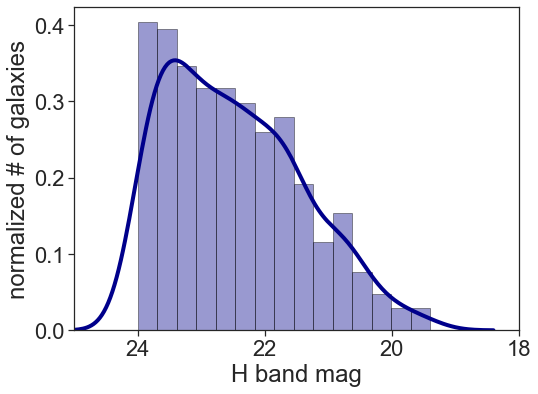

In [3]:
#plt.hist(cat_z1_hmag[z1_mask == 0],range=[18,25],bins=25,histtype='stepfilled',edgecolor='none')
#plt.xlim(-1,1)

sns.distplot(cat_z1_hmag[z1_mask == 0], hist=True, kde=True, bins=15, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(25,18)
plt.xlabel('H band mag')
plt.ylabel('normalized # of galaxies')
plt.tight_layout()
plt.savefig("../figures/fig3_distrib_z1_h.png", dpi=600)

plt.show()


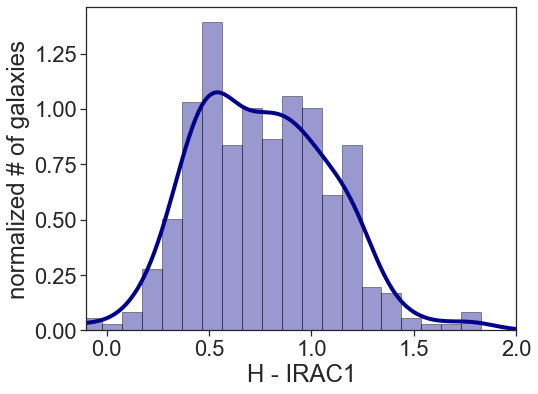

In [4]:
sns.distplot(cat_z1_col1[cat_z1_col1 > -50], hist=True, kde=True, bins=25, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.xlim(-0.1,2)
plt.xlabel('H - IRAC1')
plt.ylabel('normalized # of galaxies')
plt.tight_layout()

plt.savefig("../figures/fig3_distrib_z1_hirac.png", dpi=600)

plt.show()

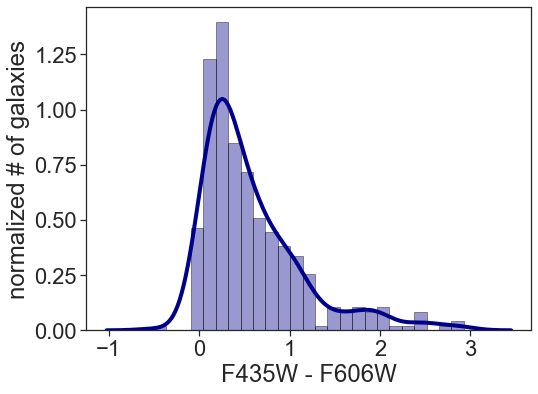

In [5]:
sns.distplot(cat_z1_col2[(cat_z1_col2>-50) & (cat_z1_col2<50)], hist=True, kde=True, bins=25, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#plt.xlim(-1,2)

plt.xlabel('F435W - F606W')
plt.ylabel('normalized # of galaxies')
plt.tight_layout()

plt.savefig("../figures/fig3_distrib_z1_f435f606.png", dpi=600)
#this is UV so ok for dust
plt.show()

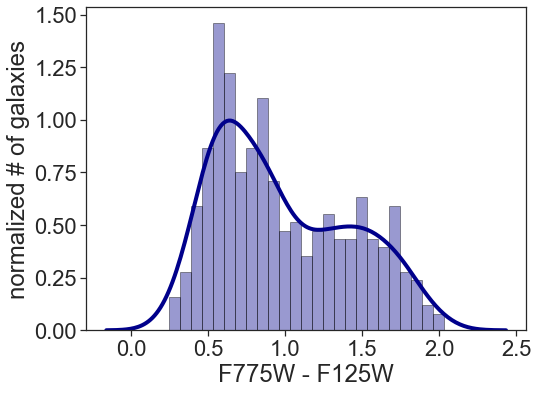

In [6]:
sns.distplot(cat_z1_col3[(cat_z1_col3>-50) & (cat_z1_col3<50)], hist=True, kde=True, bins=25, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
#plt.xlim(-1,1)
plt.xlabel('F775W - F125W')
plt.ylabel('normalized # of galaxies')
plt.tight_layout()

#plt.savefig("../figures/fig3_distrib_z1_f775f125.png", dpi=600)

plt.show()

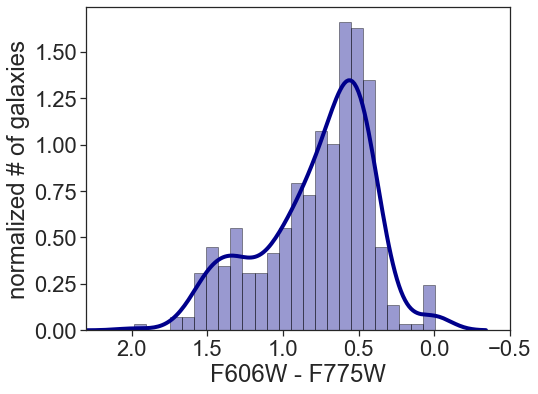

In [7]:
sns.distplot(cat_z1_col4[(cat_z1_col4>-50) & (cat_z1_col4<50)], hist=True, kde=True, bins=25, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(2.3,-0.5)
plt.xlabel('F606W - F775W')
plt.ylabel('normalized # of galaxies')
plt.tight_layout()

#plt.savefig("../figures/distrib_z1_f606f775.png", dpi=600)

plt.show()

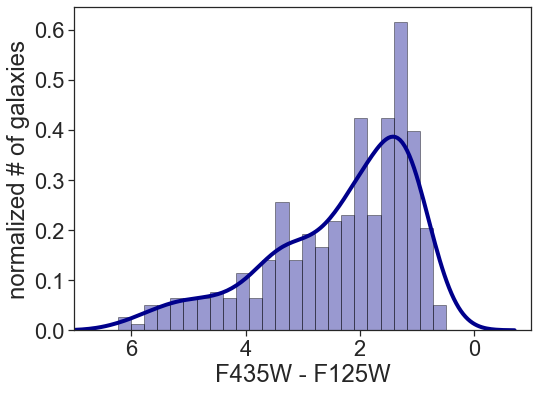

In [8]:
sns.distplot(cat_z1_col5[(cat_z1_col5>-50) & (cat_z1_col5<50)], hist=True, kde=True, bins=25, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(7,-1)
plt.xlabel('F435W - F125W')
plt.ylabel('normalized # of galaxies')
plt.tight_layout()

plt.savefig("../figures/fig3_distrib_z1_f435f125.png", dpi=600)

plt.show()